In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.1654 - val_loss: 0.1092
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.1059 - val_loss: 0.1021
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.1006 - val_loss: 0.0987
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0977 - val_loss: 0.0955
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0956 - val_loss: 0.0937
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0941 - val_loss: 0.0926
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0930 - val_loss: 0.0923
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0922 - val_loss: 0.0910
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0915 - val_loss: 0.0905
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0910 - val_loss: 0.0900
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


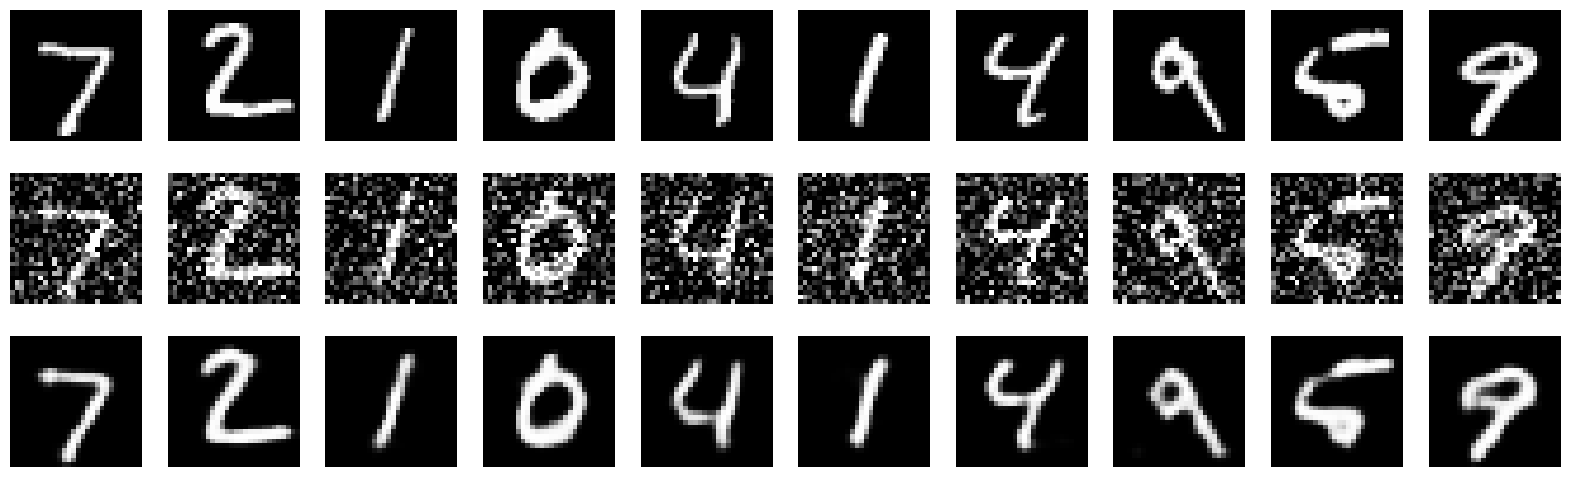

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()


x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test  = x_test.reshape((x_test.shape[0], 28, 28, 1))


noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy  = x_test  + noise_factor * np.random.normal(size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy  = np.clip(x_test_noisy, 0., 1.)


input_img = layers.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2,2), padding='same')(x)

x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
decoded = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)


denoised_imgs = autoencoder.predict(x_test_noisy)


n = 10
plt.figure(figsize=(20,6))

for i in range(n):
  
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.axis('off')


    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(x_test_noisy[i].reshape(28,28), cmap='gray')
    plt.axis('off')


    ax = plt.subplot(3, n, i+1+2*n)
    plt.imshow(denoised_imgs[i].reshape(28,28), cmap='gray')
    plt.axis('off')

plt.show()


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - kl_loss: 20.4910 - loss: 132.5149 - reconstruction_loss: 112.0239
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 23.5524 - loss: 122.8119 - reconstruction_loss: 99.2595 
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 22.9619 - loss: 112.4023 - reconstruction_loss: 89.4405
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - kl_loss: 26.0470 - loss: 119.4688 - reconstruction_loss: 93.4218
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 25.0189 - loss: 111.3580 - reconstruction_loss: 86.3391
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - kl_loss: 25.2816 - loss: 111.5476 - reconstruction_loss: 86.2660
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - kl_loss: 24.9741 - loss: 109.3385 - reconstruction_loss: 84.3644
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 25.2837 - loss: 112.0885 - reconstruction_loss: 86.8048
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms

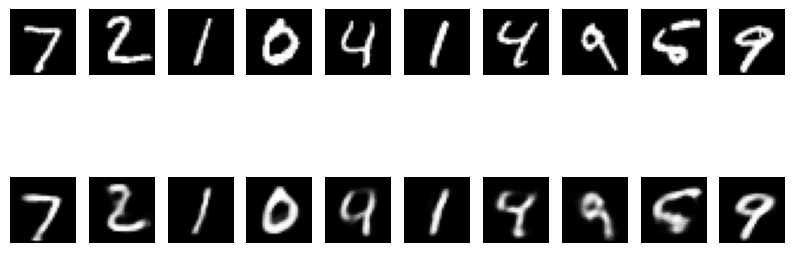

In [4]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np


original_dim = 784
intermediate_dim = 256
latent_dim = 20
batch_size = 128
epochs = 10

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)


encoder_inputs = keras.Input(shape=(original_dim,))
x = layers.Dense(intermediate_dim, activation="relu")(encoder_inputs)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        epsilon = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = Sampling()([z_mean, z_log_var])

encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")


latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(intermediate_dim, activation="relu")(latent_inputs)
decoder_outputs = layers.Dense(original_dim, activation="sigmoid")(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")


class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)

            # Reconstruction loss (Keras 3 compatible)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            ) * original_dim

            # KL divergence
            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(
                    1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var),
                    axis=1
                )
            )

            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

vae.fit(x_train, epochs=epochs, batch_size=batch_size)

import matplotlib.pyplot as plt

# Reconstruct some test images
z_mean, z_log_var, z = encoder(x_test[:10])
recon_images = decoder(z).numpy().reshape(-1, 28, 28)

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    plt.subplot(2, 10, i + 11)
    plt.imshow(recon_images[i], cmap="gray")
    plt.axis("off")

plt.show()


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 210.2695
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 168.6809
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 161.6693
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 158.6964
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 156.8980
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 155.7250
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 154.8188
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 153.9433
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 153.2765
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 152.6913


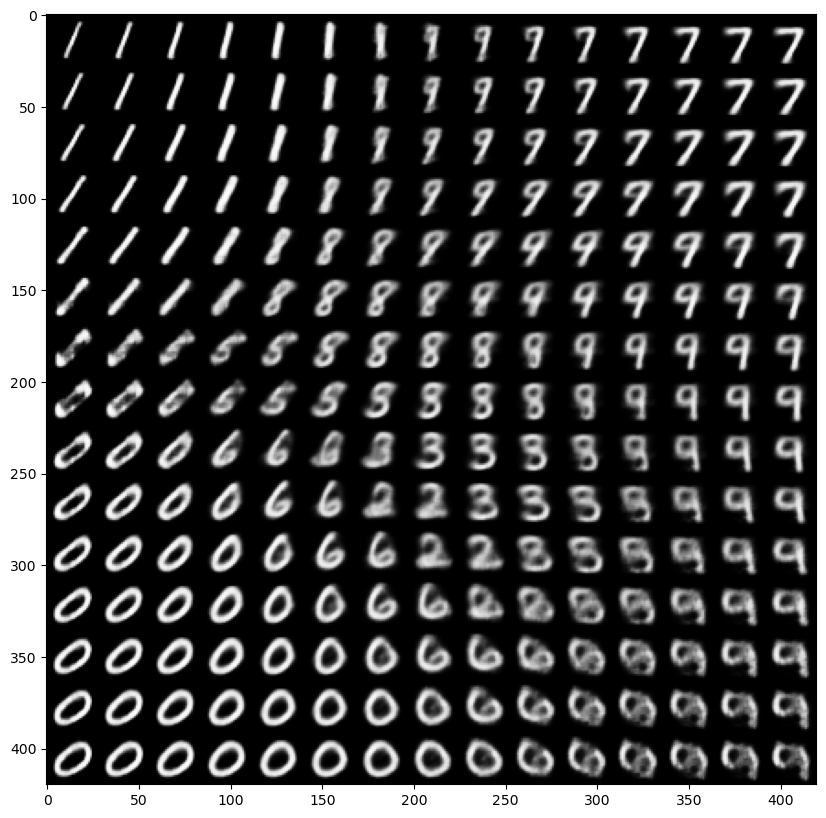

In [5]:



import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, Model, ops
from keras.optimizers import Adam
from keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

latent_dim = 2

# ENCODER
encoder_inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=tf.shape(z_mean))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])
encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# DECODER
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)
decoder = Model(latent_inputs, decoder_outputs, name="decoder")

# VAE CLASS
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(tf.keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2))
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        return {"loss": self.total_loss_tracker.result()}

# TRAIN
vae = VAE(encoder, decoder)
vae.compile(optimizer=Adam())
vae.fit(x_train, epochs=10, batch_size=128)

# VISUALIZE
n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = np.linspace(-2, 2, n)
grid_y = np.linspace(-2, 2, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample, verbose=0)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()